# REWORK
# Лабораторная работа №2
## Назаров Рустам М3232
## Вариант 18

### Аналитический метод

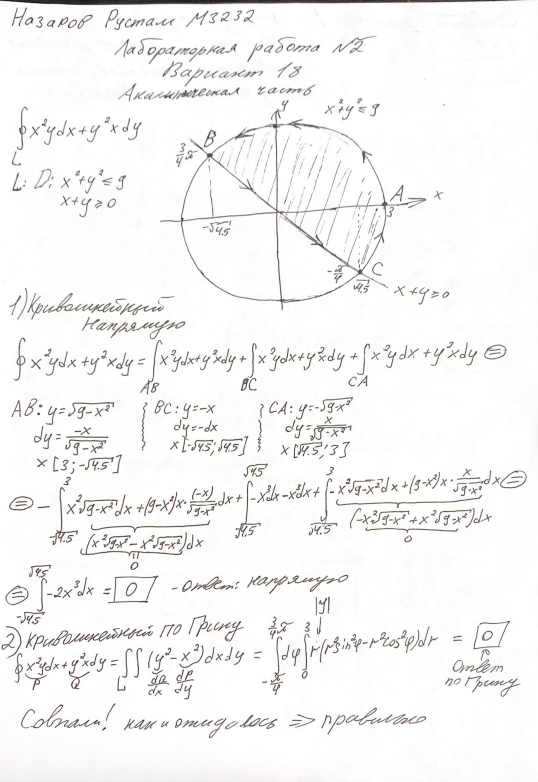

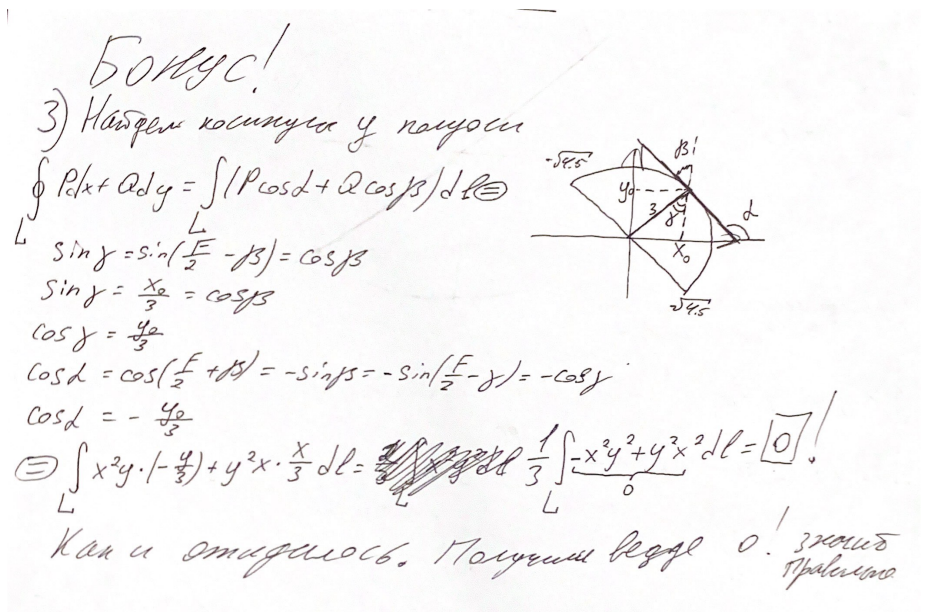

### Численный метод

язык: Python 3.8

In [4]:
#Импорты
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.lines as mlines
from scipy.integrate import quad
import pandas as pd

In [5]:
ANSWER = 0 # Ответ из аналитики с которым хотим совпасть
print(ANSWER)

0


Функция рисования графика

In [5]:
def f(x, y, str):
    x, y = np.meshgrid(x, y)

    # Определяем условия
    condition1 = x**2 + y**2 <= 9
    condition2 = x + y >= 0

    # Объединяем условия
    condition = np.logical_and(condition1, condition2)

    # Рисуем область, удовлетворяющую условиям
    plt.figure(figsize=(6,6))
    plt.contourf(x, y, condition, colors='lightblue', levels=[0.5, 1])

    # Рисуем границы областей только внутри области, удовлетворяющей обоим условиям
    plt.contour(x, y, np.logical_and(condition1, condition), colors='blue', levels=[0.5])
    plt.contour(x, y, np.logical_and(condition2, condition), colors='red', levels=[0.5])

    # Рисуем оси координат
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title(str)

    plt.show()

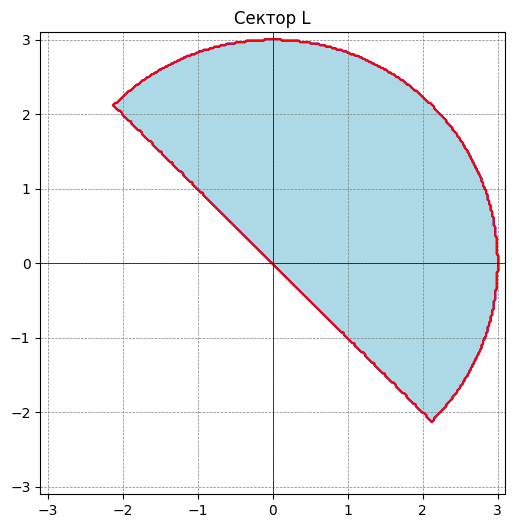

In [6]:
# Создаем сетку точек
x = np.linspace(-3.1, 3.1, 305)
y = np.linspace(-3.1, 3.1, 305)
f(x, y, "Сектор L")

## 2.1

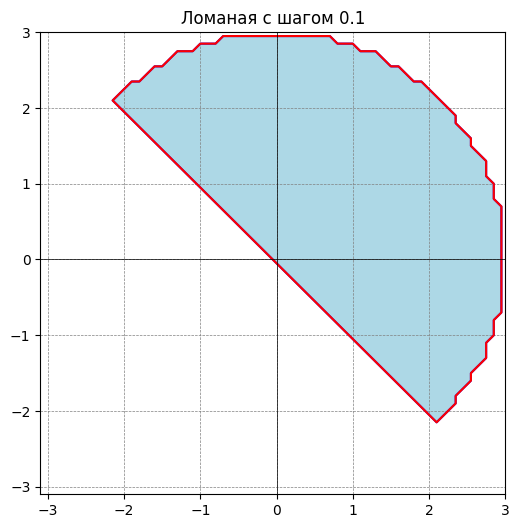

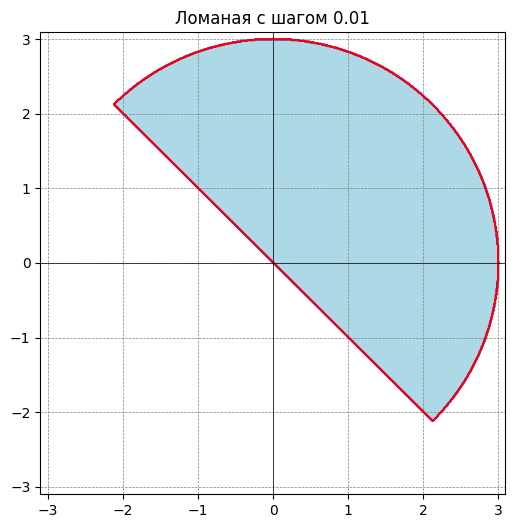

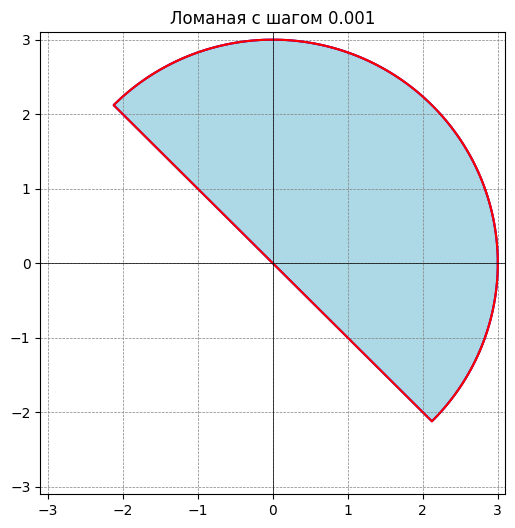

In [7]:
# Создаем сетку точек
x = np.arange(-3.1, 3.1, 0.1)
y = np.arange(-3.1, 3.1, 0.1)
f(x, y, "Ломаная с шагом 0.1")
x = np.arange(-3.1, 3.1, 0.01)
y = np.arange(-3.1, 3.1, 0.01)
f(x, y, "Ломаная с шагом 0.01")
x = np.arange(-3.1, 3.1, 0.001)
y = np.arange(-3.1, 3.1, 0.001)
f(x, y, "Ломаная с шагом 0.001")

In [6]:
deltas = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [7]:
import numpy as np

# функции, ограничивающие область интегрирования
def curve1(t):
    return t, np.sqrt(9 - t**2)  # верхняя часть окружности

def curve2(t):
    return t, -np.sqrt(9 - t**2)  # нижняя часть окружности

def curve3(t):
    return t, -t  # линия y = -x

# функции для дифференциальной формы
def f1(x, y):
    return x**2 * y

def f2(x, y):
    return y**2 * x

def count(a, a1, a2, a3):
    # Вычисляю интегральные суммы для каждого значения дельта и по заданным функциям и границам
    total_integral_sum = np.array([])
    times = []
    for delta in deltas:
        sta = time.time()
        t1 = np.linspace(a1, a2, int((a2-a1)/delta)) 
        x1, y1 = a(t1)
        integral_sum1 = a3 * (np.sum(f1(x1[:-1], y1[:-1]) * np.diff(x1)) + np.sum(f2(x1[:-1], y1[:-1]) * np.diff(y1)))
        total_integral_sum = np.append(total_integral_sum, integral_sum1)
        fn = time.time()
        ti = fn-sta
        times.append(ti)
    return total_integral_sum, times

a, t1 = count(curve1, -np.sqrt(4.5), 3, -1) # 1 сектор из аналитики
b, t2 = count(curve3, -np.sqrt(4.5), np.sqrt(4.5), 1) # 2 сектор из аналитики
c, t3 = count(curve2, np.sqrt(4.5), 3, 1) # 3 сектор из аналитики
e = a + b + c
data = {
    "Дельта": deltas,
    "Подсчет": [e[0], e[1], e[2], e[3], e[4]],
    "Отклонение": [ANSWER-e[0], ANSWER-e[1], ANSWER-e[2], ANSWER-e[3], ANSWER-e[4]],
    "Время": [t1[0] + t2[0] + t3[0], 
              t1[1] + t2[1] + t3[1], 
              t1[2] + t2[2] + t3[2], 
              t1[3] + t2[3] + t3[3], 
              t1[4] + t2[4] + t3[4]]
}

df = pd.DataFrame(data)

print(df)

    Дельта   Подсчет  Отклонение     Время
0  0.10000  4.983271   -4.983271  0.000000
1  0.01000  0.411118   -0.411118  0.000000
2  0.00100  0.039068   -0.039068  0.002009
3  0.00010  0.003846   -0.003846  0.001997
4  0.00001  0.000383   -0.000383  0.056859


## ^ОТВЕТ НА 2.1^

## 2.2

In [8]:
deltas = [0.1, 0.01, 0.001]

Для дельта = 0.1, интегральная сумма: 2.301086750000023


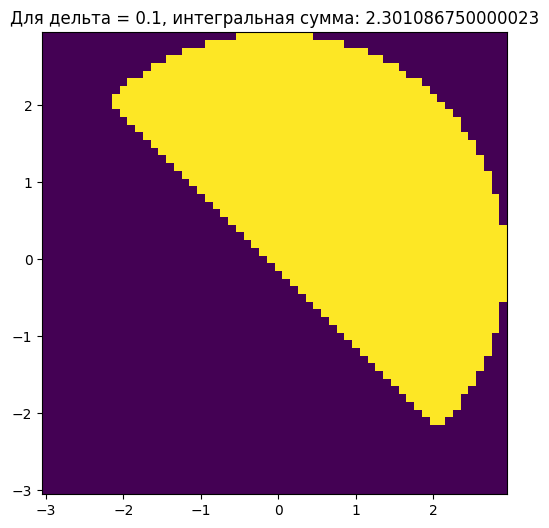

Для дельта = 0.01, интегральная сумма: 0.22921048912744466


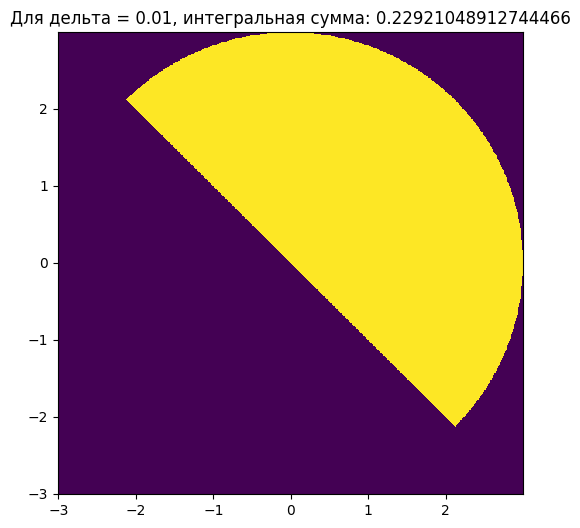

Для дельта = 0.001, интегральная сумма: 0.022910182926188623


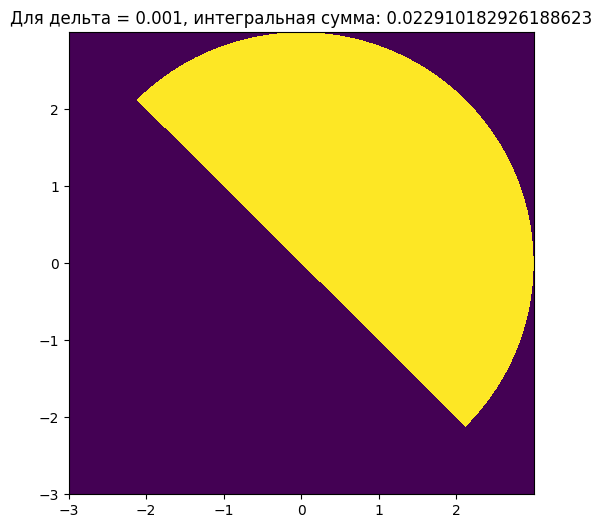

   Дельта   Подсчет  Отклонение     Время
0   0.100  2.301087   -2.301087  0.073635
1   0.010  0.229210   -0.229210  0.039818
2   0.001  0.022910   -0.022910  2.227255


In [26]:
# функции для дифференциальной формы
def f(x, y):
    return x**2 * y + y**2 * x

# функции, ограничивающие область интегрирования
def inside_curve1(x, y):
    return x**2 + y**2 <= 9

def inside_curve2(x, y):
    return y >= -x

sums = []
times = []
for delta in deltas:
    sta = time.time()
    x = np.arange(-3, 3, delta)
    y = np.arange(-3, 3, delta)
    X, Y = np.meshgrid(x, y)
    Z = f(X + delta/2, Y + delta/2) * delta # =значение функции в центрах ячеек
    mask = inside_curve1(X + delta/2, Y + delta/2) & inside_curve2(X + delta/2, Y + delta/2)  # =какие центры ячеек находятся внутри замкнутой кривой
    integral_sum = np.sum(Z[mask] * delta**2)  # интегральная сумма
    fn = time.time()

    sums.append(integral_sum)
    times.append(fn-sta)
    # график
    print(f'Для дельта = {delta}, интегральная сумма: {integral_sum}')
    plt.figure(figsize=(6, 6))
    plt.pcolormesh(X, Y, mask, cmap='viridis')
    plt.title(f'Для дельта = {delta}, интегральная сумма: {integral_sum}')
    plt.show()
data = {
    "Дельта": deltas,
    "Подсчет": [sums[0], sums[1], sums[2]],
    "Отклонение": [ANSWER-sums[0], ANSWER-sums[1], ANSWER-sums[2]],
    "Время": [times[0], times[1], times[2]]
}

# Создайте DataFrame
df = pd.DataFrame(data)

# Выведите DataFrame
print(df)

## ^ОТВЕТ НА 2.2^

### Вывод:
Итак, 
2.1 пункт стремится к 0, не сразу так как своей ломаной мы очевидно уменьшаем площадь сектора, то есть все сократится до 0 не сразу
2.2 пункт стремится к 0 сверху, так как, проверяя центры квадратов, куски торчат и увеличивают площадь сектора

Но, как и ожидалось, обе функции стремятся к ответу из Аналитики. Это доказывает правильность вычислений и примененных методов.

## БОНУС

### 4

Для дельта = 0.1, минимальная интегральная сумма: 2.031622250000021, максимальная интегральная сумма: 2.5564937500000244, разность: 0.5248715000000033


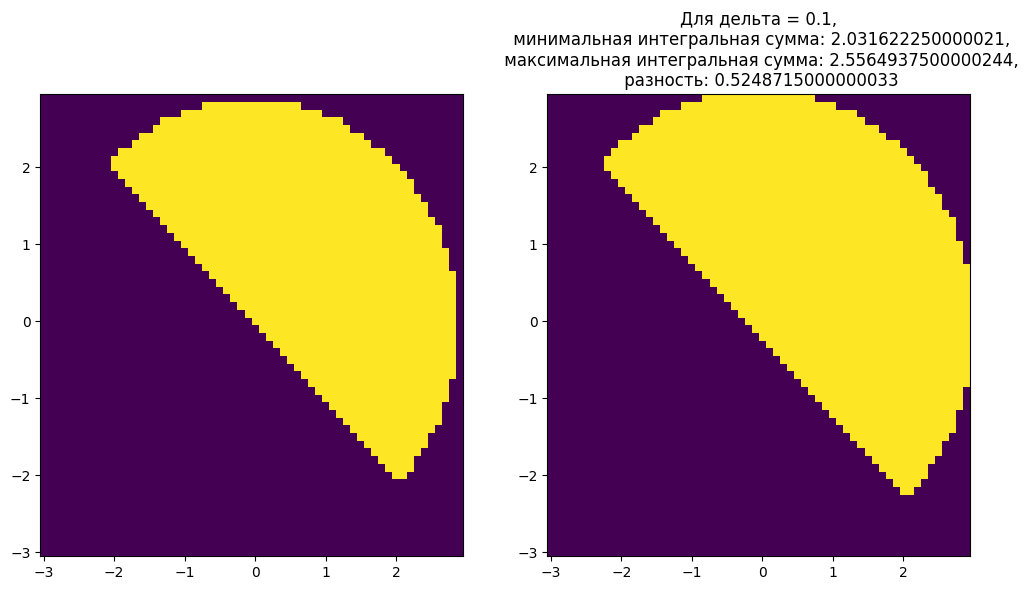

Для дельта = 0.01, минимальная интегральная сумма: 0.22652467542969512, максимальная интегральная сумма: 0.23172413615019424, разность: 0.005199460720499122


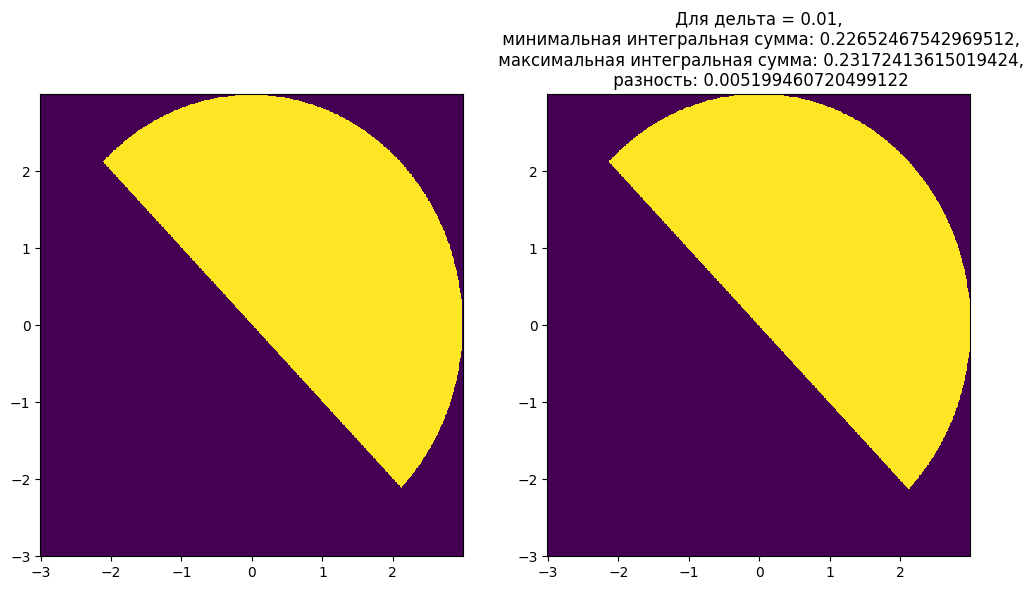

Для дельта = 0.001, минимальная интегральная сумма: 0.022884194456231254, максимальная интегральная сумма: 0.022936246652121395, разность: 5.205219589014126e-05


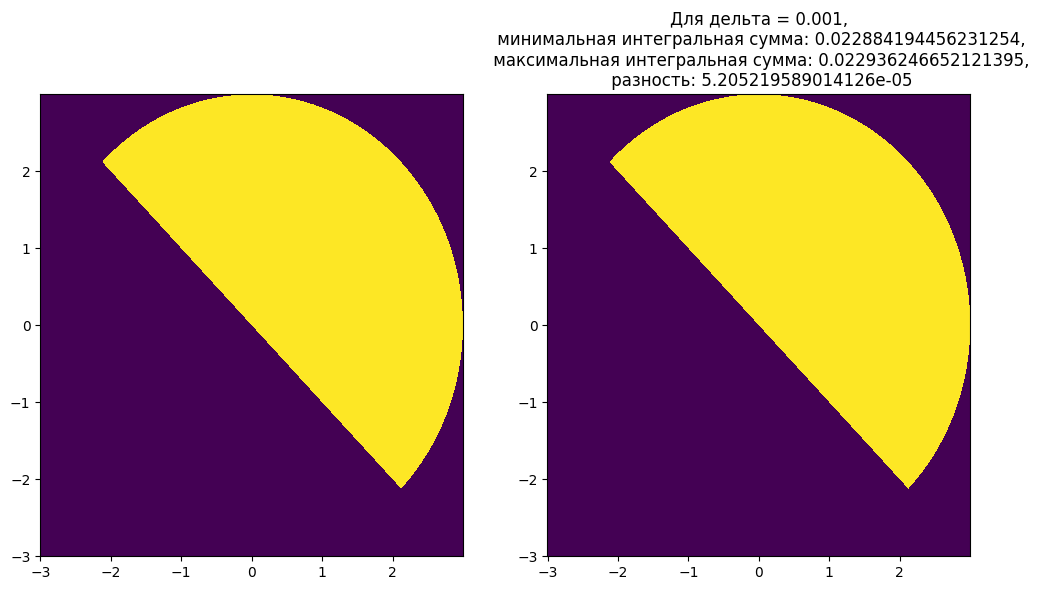

In [68]:
# функции для дифференциальной формы
def f(x, y):
    return x**2 * y + y**2 * x

# функции, ограничивающие область интегрирования
def inside_curve(x, y):
    return np.logical_and(x**2 + y**2 <= 9, y >= -x)

def on_border(x, y, delta):
    return inside_curve(x, y) | inside_curve(x + delta, y + delta) | inside_curve(x + delta, y) | inside_curve(x, y + delta)

def in_border(x, y, delta):
    return inside_curve(x, y) & inside_curve(x + delta, y + delta) & inside_curve(x + delta, y) & inside_curve(x, y + delta)

# интегральные суммы для каждого значения дельта
deltas = [0.1, 0.01, 0.001]
for delta in deltas:
    x = np.arange(-3, 3, delta)
    y = np.arange(-3, 3, delta)
    X, Y = np.meshgrid(x, y)
    Z = f(X + delta/2, Y + delta/2)*delta  # значение функции в центрах ячеек
    mask_inside = in_border(X, Y, delta)  # какие центры ячеек находятся внутри замкнутой кривой
    mask_on_border = on_border(X, Y, delta)  # какие ячейки пересекаются с D
    integral_sum_min = np.sum(Z[mask_inside]) * delta**2  # минимальную интегральную сумму
    integral_sum_max = np.sum(Z[mask_on_border]) * delta**2  # максимальную интегральную сумму
    print(f'Для дельта = {delta}, минимальная интегральная сумма: {integral_sum_min}, максимальная интегральная сумма: {integral_sum_max}, разность: {integral_sum_max - integral_sum_min}')

    # Постройте график
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pcolormesh(X, Y, mask_inside, cmap='viridis')
    plt.subplot(1, 2, 2)
    plt.pcolormesh(X, Y, mask_on_border, cmap='viridis')
    plt.title(f'Для дельта = {delta},\n минимальная интегральная сумма: {integral_sum_min},\n максимальная интегральная сумма: {integral_sum_max},\n разность: {integral_sum_max - integral_sum_min}')
    plt.show()


## Видно, что стремимся к 0

### 5

In [61]:
def NewFunc(x, y):
    x**2*y*(-y/3)+y**2*x*(x/3)

def f(x, y, str):
    x, y = np.meshgrid(x, y)

    # Определяем условия
    condition1 = x**2 + y**2 <= 9
    condition2 = x + y >= 0

    # Объединяем условия
    condition = np.logical_and(condition1, condition2)

    # Рисуем область, удовлетворяющую условиям
    plt.figure(figsize=(6,6))
    plt.contourf(x, y, condition, colors='lightblue', levels=[0.5, 1])

    # Рисуем границы областей только внутри области, удовлетворяющей обоим условиям
    plt.contour(x, y, np.logical_and(condition1, condition), colors='blue', levels=[0.5])
    plt.contour(x, y, np.logical_and(condition2, condition), colors='red', levels=[0.5])

    # Рисуем оси координат
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title(str)

    plt.show()

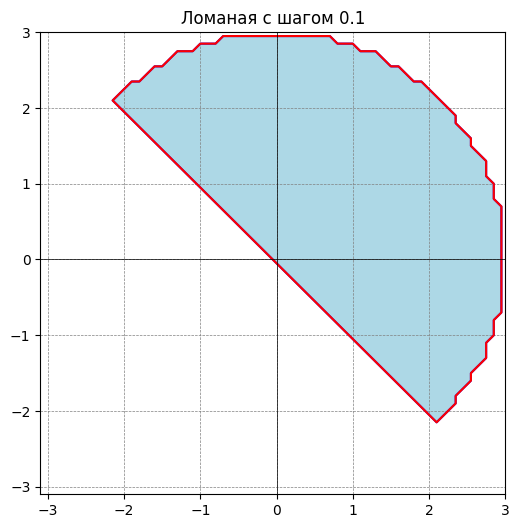

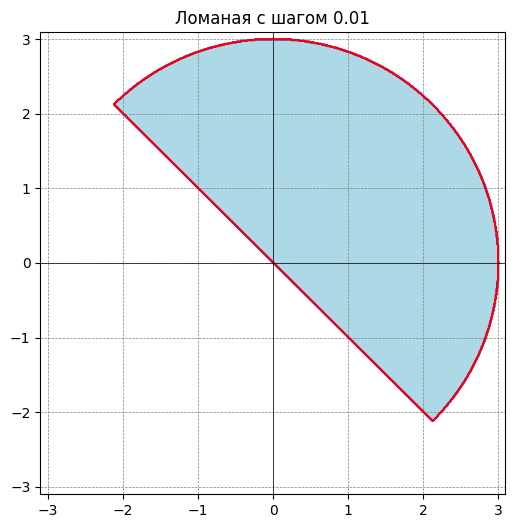

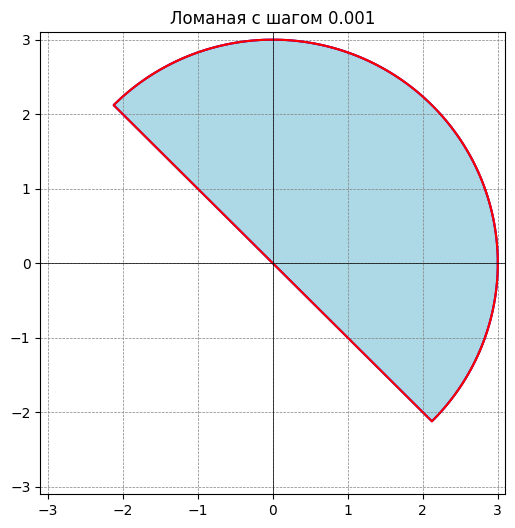

In [62]:
# Создаем сетку точек
x = np.arange(-3.1, 3.1, 0.1)
y = np.arange(-3.1, 3.1, 0.1)
f(x, y, "Ломаная с шагом 0.1")
x = np.arange(-3.1, 3.1, 0.01)
y = np.arange(-3.1, 3.1, 0.01)
f(x, y, "Ломаная с шагом 0.01")
x = np.arange(-3.1, 3.1, 0.001)
y = np.arange(-3.1, 3.1, 0.001)
f(x, y, "Ломаная с шагом 0.001")

In [6]:
deltas = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [60]:
# функции, ограничивающие область интегрирования
def curve1(t):
    return t, np.sqrt(9 - t**2)  # верхняя часть окружности

def curve2(t):
    return t, -np.sqrt(9 - t**2)  # нижняя часть окружности

def curve3(t):
    return t, -t  # линия y = -x

# функции для дифференциальной формы
def f1(x, y):
    return x**2*y*(-y/3)

def f2(x, y):
    return y**2*x*(x/3)

def count(a, a1, a2, a3):
    # Вычисляю интегральные суммы для каждого значения дельта и по заданным функциям и границам
    total_integral_sum = np.array([])
    times = []
    for delta in deltas:
        sta = time.time()
        t1 = np.linspace(a1, a2, int((a2-a1)/delta)) 
        x1, y1 = a(t1)
        delta_y=(1+delta)*delta
        integral_sum1 = a3 * (np.sum(f1(x1[:-1], y1[:-1]) * delta) + np.sum(f2(x1[:-1], y1[:-1]) * delta_y))
        total_integral_sum = np.append(total_integral_sum, integral_sum1)
        fn = time.time()
        ti = fn-sta
        times.append(ti)
    return total_integral_sum, times

a, t1 = count(curve1, -np.sqrt(4.5), 3, -1) # 1 сектор из аналитики
b, t2 = count(curve3, -np.sqrt(4.5), np.sqrt(4.5), 1) # 2 сектор из аналитики
c, t3 = count(curve2, np.sqrt(4.5), 3, 1) # 3 сектор из аналитики
data = {
    "Дельта": deltas,
    "Подсчет": [e[0], e[1], e[2], e[3], e[4]],
    "Отклонение": [ANSWER-e[0], ANSWER-e[1], ANSWER-e[2], ANSWER-e[3], ANSWER-e[4]],
    "Время": [t1[0] + t2[0] + t3[0], 
              t1[1] + t2[1] + t3[1], 
              t1[2] + t2[2] + t3[2], 
              t1[3] + t2[3] + t3[3], 
              t1[4] + t2[4] + t3[4]]
}

df = pd.DataFrame(data)

print(df)

    Дельта   Подсчет  Отклонение     Время
0  0.10000 -0.823407    0.823407  0.002661
1  0.01000 -0.077025    0.077025  0.000872
2  0.00100 -0.007642    0.007642  0.000934
3  0.00010 -0.000764    0.000764  0.003428
4  0.00001 -0.000076    0.000076  0.135938


#### Не сокращаются подобные, потому что дельта у "y" другая чуть чуть, но стремление к 0 очевидно